In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import time
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.porter import PorterStemmer

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [20]:
train.shape

(1804874, 45)

In [21]:
test.shape

(97320, 2)

In [3]:
train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [8]:
df = train[['comment_text', 'target']]

In [9]:
df.comment_text.head()

0    This is so cool. It's like, 'would you want yo...
1    Thank you!! This would make my life a lot less...
2    This is such an urgent design problem; kudos t...
3    Is this something I'll be able to install on m...
4                 haha you guys are a bunch of losers.
Name: comment_text, dtype: object

In [10]:
df['labels'] = (df['target'] >= 0.5).astype(int)

<ipython-input-10-1e9be8338d85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels'] = (df['target'] >= 0.5).astype(int)


In [11]:
df.head()

,comment_text,target,labels
0,"This is so cool. It's like, 'would you want yo...",0.000000,0
1,Thank you!! This would make my life a lot less...,0.000000,0
2,This is such an urgent design problem; kudos t...,0.000000,0
3,Is this something I'll be able to install on m...,0.000000,0
4,haha you guys are a bunch of losers.,0.893617,1


C:\Users\BS542\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='labels', ylabel='count'>

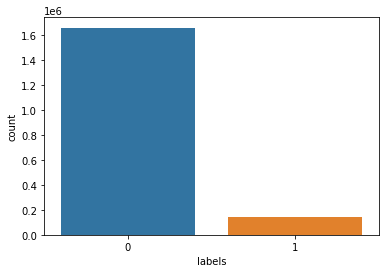

In [12]:
sns.countplot(df['labels'])

In [18]:
%%time
token_lens = []
for text in df.comment_text:
    tokens = word_tokenize(text)
    token_lens.append(len(tokens))

Wall time: 10min 56s


C:\Users\BS542\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

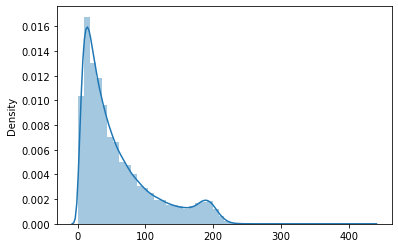

In [19]:
sns.distplot(token_lens)

In [10]:
st = PorterStemmer()

In [11]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [14]:
def process_text(texts):
    
    corpus = []
    
    samples_completed = 0
    
    start = time.time()
    
    for (idx, text) in enumerate(texts):
    
        text = text.lower()

        for key in contractions:
            value = contractions[key]
            text = text.replace(key, value)

        for punc in list(punctuation):
            text = text.replace(punc, '')

        text = text.split()

        text = [st.stem(word) for word in text if word not in stopwords.words('english')]

        text = ' '.join(text)
        
        corpus.append(text)
        
        if (idx+1) % 10000 == 0:
            samples_completed += 10000
            print(f'Done for {samples_completed} texts')
            print(f'Duration for 10,000 sampels: {time.time() - start}')
            start = time.time()
    
    return corpus

In [16]:
%%time
X_train = process_text(df.comment_text.values)

Done for 20000 texts
Duration for 10,000 sampels: 109.8931257724762
Done for 30000 texts
Duration for 10,000 sampels: 98.66737604141235
Done for 40000 texts
Duration for 10,000 sampels: 95.48126101493835
Done for 50000 texts
Duration for 10,000 sampels: 95.60384559631348
Done for 60000 texts
Duration for 10,000 sampels: 100.03803825378418
Done for 70000 texts
Duration for 10,000 sampels: 92.19299411773682
Done for 80000 texts
Duration for 10,000 sampels: 94.07646775245667
Done for 90000 texts
Duration for 10,000 sampels: 97.47564363479614
Done for 100000 texts
Duration for 10,000 sampels: 97.19663000106812
Done for 110000 texts
Duration for 10,000 sampels: 99.80796980857849
Done for 120000 texts
Duration for 10,000 sampels: 97.26198625564575
Done for 130000 texts
Duration for 10,000 sampels: 97.22037816047668
Done for 140000 texts
Duration for 10,000 sampels: 92.87584018707275
Done for 150000 texts
Duration for 10,000 sampels: 92.15343117713928
Done for 160000 texts
Duration for 10,000

Done for 1210000 texts
Duration for 10,000 sampels: 84.19476413726807
Done for 1220000 texts
Duration for 10,000 sampels: 92.95915460586548
Done for 1230000 texts
Duration for 10,000 sampels: 97.70600152015686
Done for 1240000 texts
Duration for 10,000 sampels: 91.0356216430664
Done for 1250000 texts
Duration for 10,000 sampels: 87.66515684127808
Done for 1260000 texts
Duration for 10,000 sampels: 91.21673703193665
Done for 1270000 texts
Duration for 10,000 sampels: 91.39696264266968
Done for 1280000 texts
Duration for 10,000 sampels: 83.19346952438354
Done for 1290000 texts
Duration for 10,000 sampels: 88.33189916610718
Done for 1300000 texts
Duration for 10,000 sampels: 88.9108898639679
Done for 1310000 texts
Duration for 10,000 sampels: 83.47222900390625
Done for 1320000 texts
Duration for 10,000 sampels: 84.0505759716034
Done for 1330000 texts
Duration for 10,000 sampels: 89.3731210231781
Done for 1340000 texts
Duration for 10,000 sampels: 89.17681503295898
Done for 1350000 texts
D

In [22]:
y_train = df.labels.values

In [23]:
data = {"text": X_train,
        "label": y_train}

In [24]:
processed_csv = pd.DataFrame(data)

In [25]:
processed_csv.head()

,text,label
0,cool like would want mother read realli great ...,0
1,thank would make life lot less anxietyinduc ke...,0
2,urgent design problem kudo take impress,0
3,someth abl instal site releas,0
4,haha guy bunch loser,1


In [29]:
processed_csv.to_csv('processed_train.csv', index=False)

In [27]:
%%time
token_lens = []
for text in X_train:
    tokens = text.split()
    token_lens.append(len(tokens))

Wall time: 2.89 s


C:\Users\BS542\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


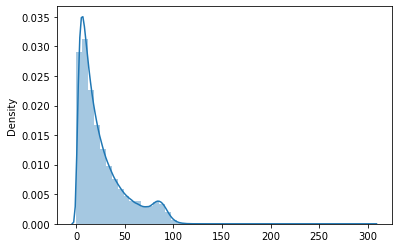

In [38]:
sns_plot = sns.distplot(token_lens)

In [36]:
X_test = process_text(test.comment_text.values)

Done for 20000 texts
Duration for 10,000 sampels: 89.50954246520996
Done for 30000 texts
Duration for 10,000 sampels: 91.51566076278687
Done for 40000 texts
Duration for 10,000 sampels: 91.09845018386841
Done for 50000 texts
Duration for 10,000 sampels: 89.64175462722778
Done for 60000 texts
Duration for 10,000 sampels: 92.9445915222168
Done for 70000 texts
Duration for 10,000 sampels: 90.97537064552307
Done for 80000 texts
Duration for 10,000 sampels: 87.7637243270874
Done for 90000 texts
Duration for 10,000 sampels: 88.14662623405457
Done for 100000 texts
Duration for 10,000 sampels: 89.56486058235168


In [39]:
sns_plot.figure.savefig('distribution_after.png')

In [41]:
with open('distribution_after_list.txt', 'w') as f:
    for l in token_lens:
        f.write(str(l) + "\n")

In [43]:
%%time
token_lens = []
for text in X_test:
    tokens = text.split()
    token_lens.append(len(tokens))

Wall time: 159 ms


C:\Users\BS542\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

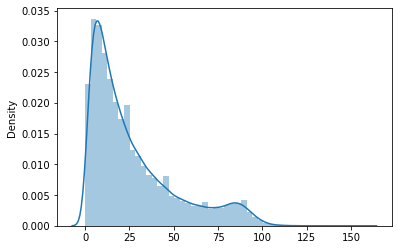

In [44]:
sns.distplot(token_lens)

In [45]:
test.head()

,id,comment_text
0,7097320,[ Integrity means that you pay your debts.]\n\...
1,7097321,This is malfeasance by the Administrator and t...
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...
3,7097323,"Paul: Thank you for your kind words. I do, in..."
4,7097324,Sorry you missed high school. Eisenhower sent ...


In [46]:
data = {'id': test.id,
        'text': X_test}

In [48]:
test_csv = pd.DataFrame(data)

In [49]:
test_csv.head()

,id,text
0,7097320,integr mean pay debt appli presid trump
1,7097321,malfeas administr board wast money
2,7097322,rmiller101 spoken like true elitist look bud r...
3,7097323,paul thank kind word inde strong belief hide b...
4,7097324,sorri miss high school eisenhow sent troop vie...


In [51]:
test_csv.to_csv('processed_test.csv', index=False)

In [52]:
MAX_LEN = 100